In [ ]:
pip install numpy matplotlib laspy lazrs opencv-python

In [ ]:
pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-avfjjqqp
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-avfjjqqp
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=1a39fb55bb4bd0ba07185f7fa16d925591c2f43c915f89d17b240805788a3e40
  Stored in directory: /tmp/pip-ephem-wheel-cache-u6aob49g/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [1]:
# The Base libraries
import cv2
import gc
import laspy
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
from tqdm import tqdm


# The Deep Learning libraries
from segment_anything import sam_model_registry
from segment_anything import SamAutomaticMaskGenerator
import torch

print('CUDA available -> ', torch.cuda.is_available())
print('CUDA GPU number -> ', torch.cuda.device_count())
print('GPU -> ', torch.cuda.get_device_name())

#You can run the line below to test if you have the ability to leverage CUDA
torch.cuda.is_available()

#Choose between cpu or cuda training. For cpu, input 'cpu' instead 'cuda:0'
USED_D = torch.device('cuda:0')

# Clear memory and set split size
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
gc.collect()
torch.cuda.empty_cache()

CUDA available ->  True
CUDA GPU number ->  1
GPU ->  Tesla T4


### Download the segment anything model checkpoint

In [106]:
HOME = os.getcwd()
os.system(f"mkdir {HOME}/weights")
# os.system(f"wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights")
# os.system(f"wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth -P {HOME}/weights")

MODEL = f"{HOME}/weights/sam_vit_h_4b8939.pth" # Large model
# MODEL = f"{HOME}/weights/sam_vit_l_0b3195.pth" # Medium model

# Load the model checkpoints
sam = sam_model_registry["vit_h"](checkpoint = MODEL)
# sam = sam_model_registry["vit_l"](checkpoint = MODEL) # Medium model

# Cast your model to a specific device (cuda or cpu)
sam.to(device = USED_D)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

### Some useful functions

In [79]:
def sam_masks(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    c_mask=[]
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.8)))
        c_mask.append(img)
    return c_mask

def cloud_to_image(pcd_np, resolution):
    minx = np.min(pcd_np[:, 0])
    maxx = np.max(pcd_np[:, 0])
    miny = np.min(pcd_np[:, 1])
    maxy = np.max(pcd_np[:, 1])
    width = int((maxx - minx) / resolution) + 1
    height = int((maxy - miny) / resolution) + 1
    image = np.zeros((height, width, 3), dtype=np.uint8)
    for point in pcd_np:
        x, y, *_ = point
        r, g, b = point[-3:]
        pixel_x = int((x - minx) / resolution)
        pixel_y = int((maxy - y) / resolution)
        image[pixel_y, pixel_x] = [r, g, b]
    return image

def generate_spherical_image(center_coordinates, point_cloud, colors, resolution_y=500):
    # Translate the point cloud by the negation of the center coordinates
    translated_points = point_cloud - center_coordinates

    # Convert 3D point cloud to spherical coordinates
    theta = np.arctan2(translated_points[:, 1], translated_points[:, 0])
    phi = np.arccos(translated_points[:, 2] / np.linalg.norm(translated_points, axis=1))

    # Map spherical coordinates to pixel coordinates
    x = (theta + np.pi) / (2 * np.pi) * (2 * resolution_y)
    y = phi / np.pi * resolution_y

     # Create the spherical image with RGB channels
    resolution_x = 2 * resolution_y
    # resolution_y,resolution_x = 963,1927
    image = np.zeros((resolution_y, resolution_x, 3), dtype=np.uint8)

    # Create the mapping between point cloud and image coordinates
    mapping = np.full((resolution_y, resolution_x), -1, dtype=int)

    # Assign points to the image pixels
    for i in tqdm(range(len(translated_points))):
        ix = np.clip(int(x[i]), 0, resolution_x - 1)
        iy = np.clip(int(y[i]), 0, resolution_y - 1)
        if mapping[iy, ix] == -1 or np.linalg.norm(translated_points[i]) < np.linalg.norm(translated_points[mapping[iy, ix]]):
            mapping[iy, ix] = i
            image[iy, ix] = colors[i]
    return image, mapping

def color_point_cloud(image_path, point_cloud, mapping):
    image = cv2.imread(image_path)
    original_shape = mapping.shape
    # Upscale the segmentation result to match the original image dimensions
    segmentation_upscaled = cv2.resize(image, (original_shape[1], original_shape[0]),
                                      interpolation=cv2.INTER_NEAREST)  # Use INTER_NEAREST for segmentation
    h, w = segmentation_upscaled.shape[:2]
    modified_point_cloud = np.zeros((point_cloud.shape[0], point_cloud.shape[1]+3), dtype=np.float32)
    # print(modified_point_cloud.shape)
    modified_point_cloud[:, :3] = point_cloud
    for iy in tqdm(range(h)):
        for ix in range(w):
            point_index = mapping[iy, ix]
            if point_index != -1:
                color = segmentation_upscaled[iy, ix]
                modified_point_cloud[point_index, 3:] = color
    return modified_point_cloud


def export_point_cloud(cloud_path, modified_point_cloud):
    # 1. Create a new header
    header = laspy.LasHeader(point_format=3, version="1.2")
    header.add_extra_dim(laspy.ExtraBytesParams(name="random", type=np.int32))

    # 2. Create a Las
    las_o = laspy.LasData(header)
    las_o.x = modified_point_cloud[:,0]
    las_o.y = modified_point_cloud[:,1]
    las_o.z = modified_point_cloud[:,2]
    las_o.red = modified_point_cloud[:,3]
    las_o.green = modified_point_cloud[:,4]
    las_o.blue = modified_point_cloud[:,5]
    las_o.write(cloud_path)

    print("Export succesful at: ", cloud_path)
    return

### Load the las files

In [38]:
las = laspy.read("/content/Cropped_CableMnt_RA_2019_PC_POI.las")

# Transforming to a numpy array
coords = np.vstack((las.x, las.y, las.z))
point_cloud = coords.transpose()

# Gathering the colors
r=(las.red/las.red.max()*255).astype(int)
g=(las.green/las.green.max()*255).astype(int)
b=(las.blue/las.blue.max()*255).astype(int)
colors = np.vstack((r,g,b)).transpose()

In [63]:
resolution = 500  # Resolution to downsample the model to

#Defining the position in the point cloud to generate a panorama
center_coordinates = [328320, 4126105, 1650] # 328290, 4126115, 1580

100%|██████████| 2508353/2508353 [01:37<00:00, 25793.96it/s]


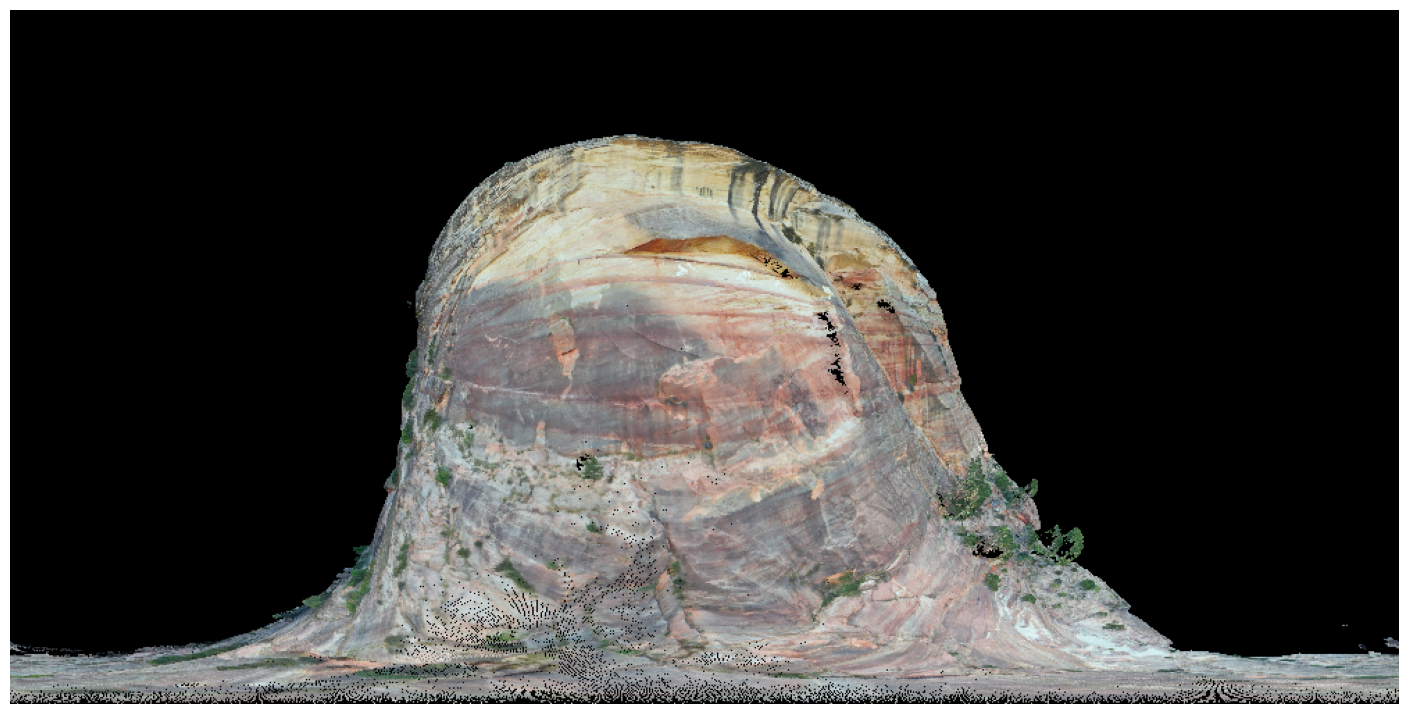

In [80]:
#Function Execution
spherical_image,mapping = generate_spherical_image(center_coordinates, point_cloud, colors, resolution)
# mapping

#Plotting with matplotlib
fig = plt.figure(figsize=(np.shape(spherical_image)[1]/72, np.shape(spherical_image)[0]/72))
fig.add_axes([0,0,1,1])
plt.imshow(spherical_image)
plt.axis('off')

#Saving to the disk
plt.savefig("/content/Cable_mountain_spherical_projection.jpg")

In [107]:
gc.collect()
torch.cuda.empty_cache()

### Segment the image with SAM

In [108]:
mask_generator = SamAutomaticMaskGenerator(sam)

temp_img = cv2.imread("/content/Cable_mountain_spherical_projection.jpg")
image_rgb = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)

t0 = time()
result = mask_generator.generate(image_rgb)
t1 = time()

print(f"Prediction completed in {t1-t0:.2f} seconds")

Prediction completed in 9.34 seconds


In [109]:
gc.collect()
torch.cuda.empty_cache()

### Plot the segmented image

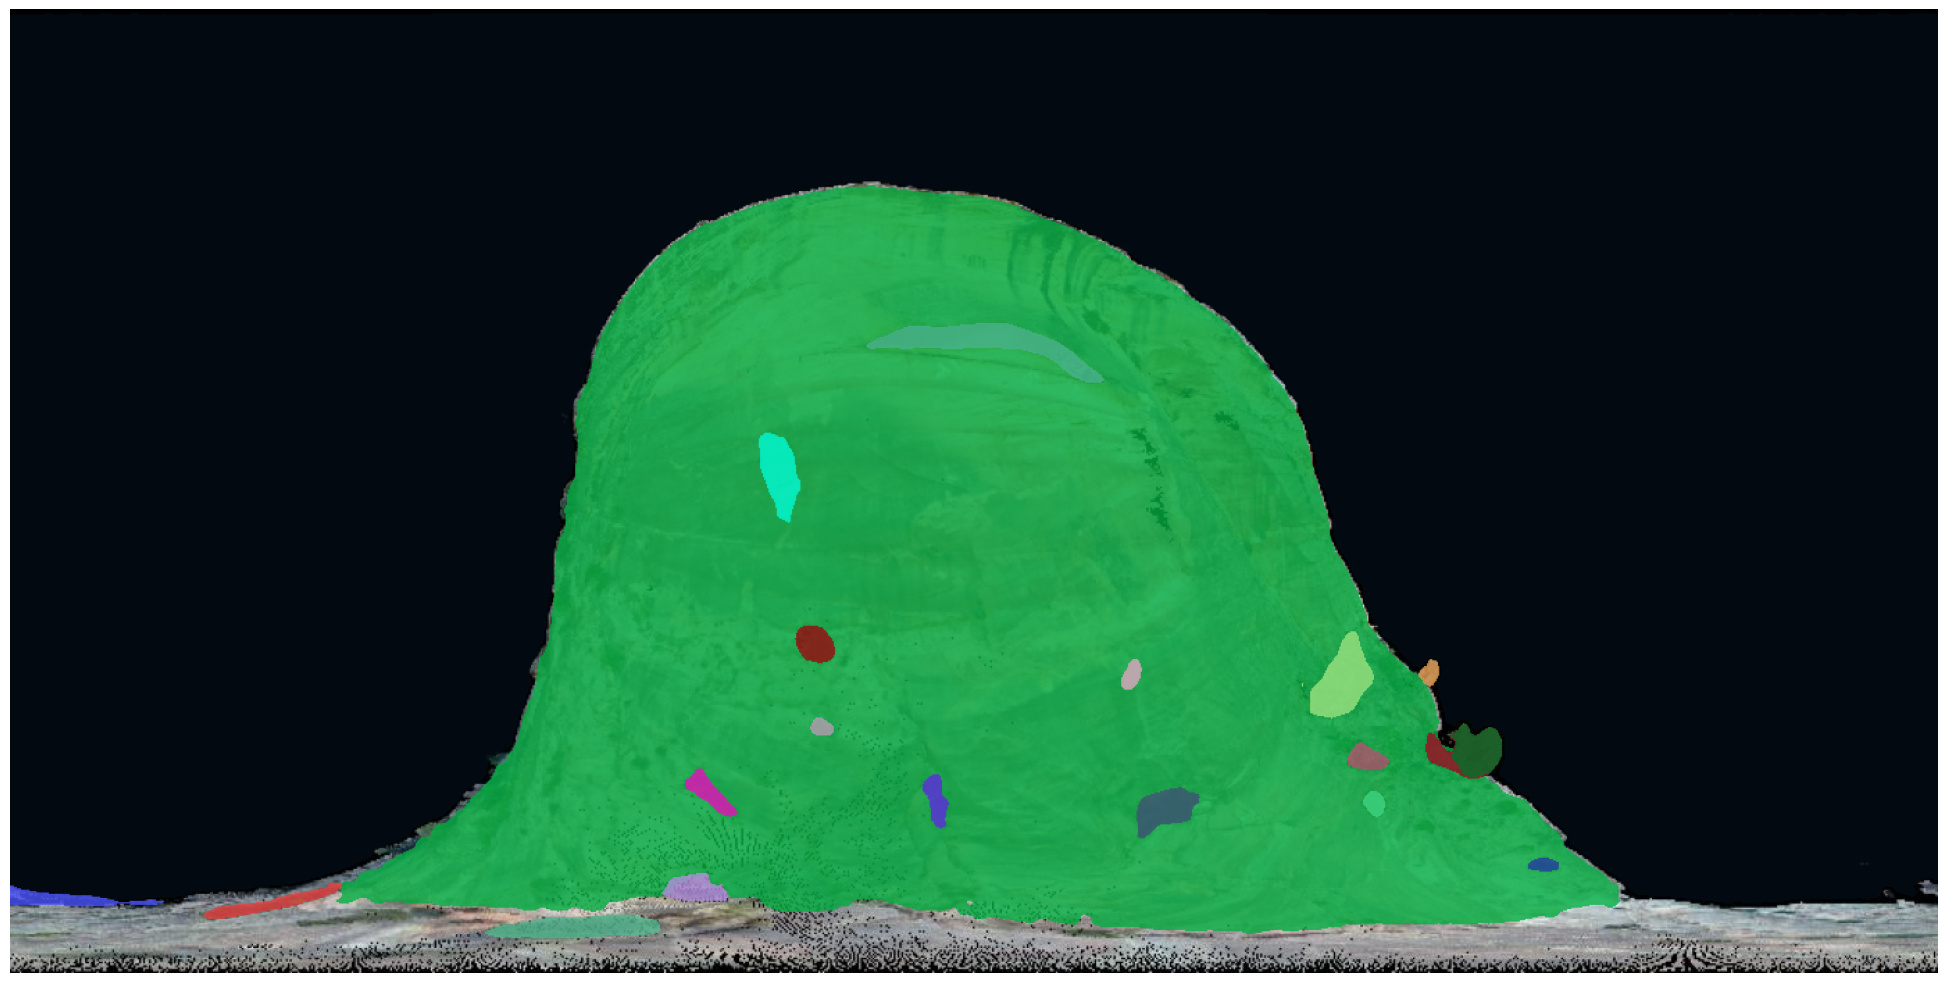

In [110]:
fig = plt.figure(figsize=(np.shape(image_rgb)[1]/72, np.shape(image_rgb)[0]/72))
fig.add_axes([0,0,1,1])

plt.imshow(image_rgb)
color_mask = sam_masks(result)
plt.axis('off')
plt.savefig("/content/Cable_mountain_spherical_projection_segmented.jpg")
plt.show()

### Export the point cloud

In [111]:
image_path = "/content/Cable_mountain_spherical_projection_segmented.jpg"
modified_point_cloud = color_point_cloud(image_path, point_cloud, mapping)

export_point_cloud("/content/pcd_results.las", modified_point_cloud)

100%|██████████| 500/500 [00:00<00:00, 837.75it/s]


Export succesful at:  /content/pcd_results.las
